# Classification of cats and dogs using SVM


***Problem Statement***: Predict given image as cat or Dog using SVM

***Dataset***: The dataset used is [Dogs vs. Cats]('https://www.kaggle.com/competitions/dogs-vs-cats/code?competitionId=3362&searchQuery=svm') from Kaggle. The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

***Methodology***:

The following steps are adapted to perform the prediction:

1. Data Collection and Exploration
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Building

## 1. Data Collection and Exploration

### a. Import the necessary libraries

In [1]:
# Import modules

# Modules for Data Manipulation
import numpy as np
import os
import cv2
import pandas as pd
import random
import zipfile
from PIL import Image

# Modules for Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import matplotlib.image as img

# Sckit-learn module for Model building and evaluation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import exposure
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


### b. Loading the data

In [1]:
zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("../input/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

### c. Data Exploration

In [11]:
# Generate file names and file paths into a list
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
file_path = [os.path.join(TRAIN_DIR_PATH,file_name) for file_name in file_names]
print('There are {} number of images in directory.'.format(len(file_names)))


There are 25000 number of images in directory.


In [12]:
# Add label to images
# dog = 1, cat = 0
labels = []
cat_count = 0
dog_count = 0

# Process train images
for image in file_names:
    if image[0:3] == 'cat' :
        label = 0
        cat_count += 1
    else :
        label = 1
    labels.append(label)

print('Number of cat images:',cat_count)
print('Number of dog images:',len(file_names) - cat_count)

Number of cat images: 12500
Number of dog images: 12500


The first 12500 images are cat images and the rest are dog images as dataset is in order. We can spilt them easily

In [13]:
# Spilt into cate and dog images
cat_images = file_names[:12500]
cat_path = file_path[:12500]

dog_images = file_names[12500:]
dog_path = file_path[12500:]


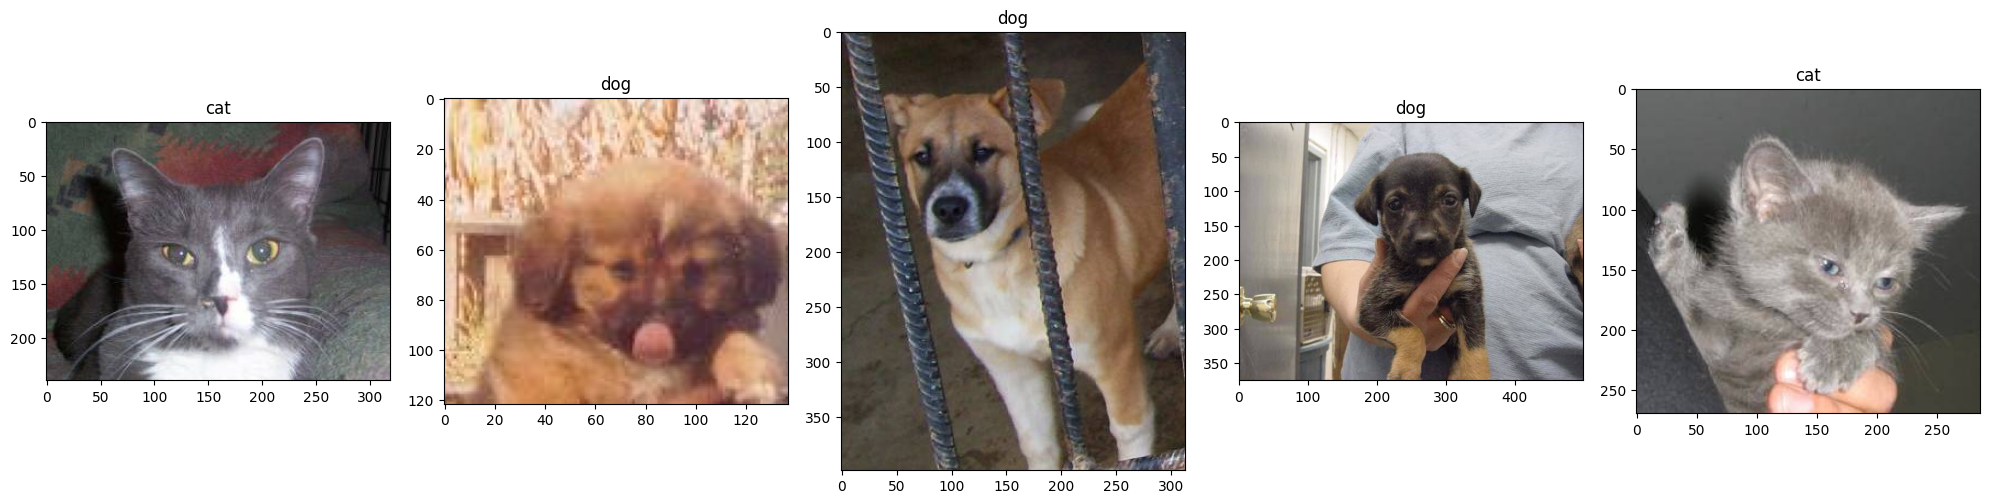

In [14]:
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(5):
    title = file_names[i].split('.')[0]
    b = img.imread(file_path[i])
    axes.append(fig.add_subplot(1,5,a+1))
    plt.imshow(b)
    plt.title(title)
    i=random.randint(1,len(file_path))

fig.tight_layout()
plt.show()


## 2. Data Preprocessing

### a. Data Augmentation

In [33]:
# Preprocess the data
features = []
image_size = (50, 50)

def process_images(file_path):
    new_features = []
    # Proses train images
    for path in file_path:
        image_read = cv2.imread(path)
        # resize the image
        image_resized = cv2.resize(image_read, image_size)
        # Convert to grayscale image
        image_bw = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
        image_normalized = image_bw / 255.0
        # Flatten the image to use as feature vector
        img = image_normalized.flatten()
        new_features.append(img)

    return new_features

In [16]:
features = process_images(file_path)

### b. Data Splitting

To maintain diversity in dataset, let's shuffle the dataset

In [17]:
# Convert the lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Shuffling image order
indices = np.arange(len(features))
np.random.shuffle(indices)
features = features[indices]
labels = labels[indices]
features

array([[0.41568627, 0.57254902, 0.59215686, ..., 0.48235294, 0.43921569,
        0.46666667],
       [0.52156863, 0.6745098 , 0.61176471, ..., 0.6627451 , 0.51372549,
        0.59607843],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.20392157, 0.2       ,
        0.18039216],
       ...,
       [0.45098039, 0.50588235, 0.50980392, ..., 0.14117647, 0.16862745,
        0.15294118],
       [0.05098039, 0.06666667, 0.30196078, ..., 0.34509804, 0.10588235,
        0.15686275],
       [0.43921569, 0.43921569, 0.42352941, ..., 0.38039216, 0.4       ,
        0.41960784]])

In [20]:
n_samples = 2000

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(features[:n_samples], labels[:n_samples],train_size=0.8, test_size=0.2, shuffle=True, random_state=42)

print('Training dataset:', X_train.shape,Y_train.shape)
print('Testing dataset:', X_test.shape, Y_test.shape)


Training dataset: (1600, 2500) (1600,)
Testing dataset: (400, 2500) (400,)


## 3. Model Training and Evaluation

### a.Model Training

In [21]:
# Training the SVM

train_pred = {}
test_pred = {}
kernels = ('linear','poly', 'rbf', 'sigmoid')

# Create SVM object
for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1)

    # Train the SVM
    svm_model.fit(X_train[:n_samples], Y_train[:n_samples])

    # Make predictions on the test set
    train_pred[kernel] = svm_model.predict(X_train[:n_samples])
    test_pred[kernel] = svm_model.predict(X_test[:n_samples])

### b. Model Evaluation

In [22]:
# Evaluate the model
def evaluate(pred1, pred2):
    accuracy = accuracy_score(pred1, pred2)
    precision = precision_score(pred1, pred2)
    recall = recall_score(pred1, pred2)
    f1 = f1_score(pred1, pred2)
    conf_matrix = confusion_matrix(pred1, pred2)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n")

    # Display the confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['cat','dog'])
    disp.plot(cmap='viridis', values_format='d')
    plt.show()

    return accuracy

SVM with linear Kernel:

Training Metrics: 

Accuracy: 0.999375
Precision: 1.0
Recall: 0.9987325728770595
F1 Score: 0.9993658845909955
Confusion Matrix:



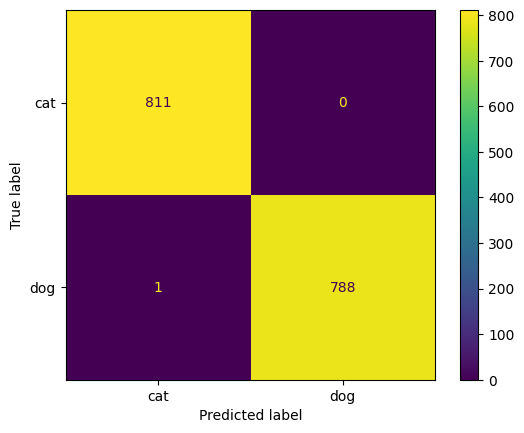

Testing Metrics:

Accuracy: 0.53
Precision: 0.5126903553299492
Recall: 0.5233160621761658
F1 Score: 0.5179487179487179
Confusion Matrix:



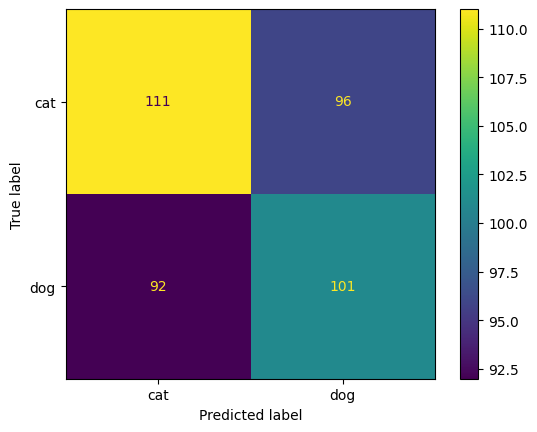




SVM with poly Kernel:

Training Metrics: 

Accuracy: 0.99875
Precision: 0.9974715549936789
Recall: 1.0
F1 Score: 0.9987341772151899
Confusion Matrix:



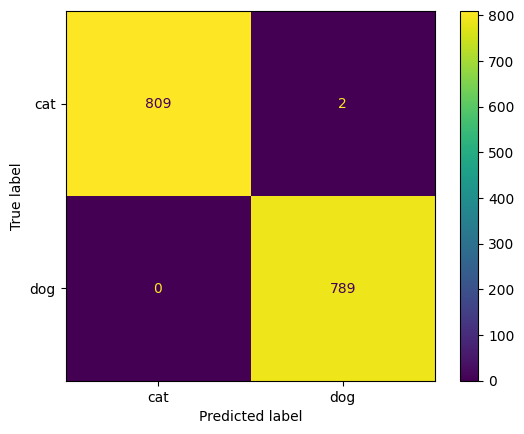

Testing Metrics:

Accuracy: 0.5675
Precision: 0.5555555555555556
Recall: 0.5181347150259067
F1 Score: 0.5361930294906166
Confusion Matrix:



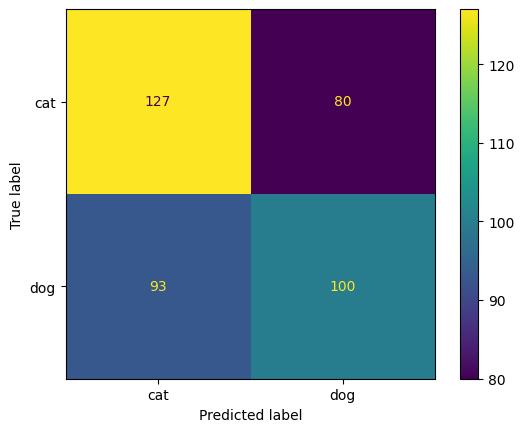




SVM with rbf Kernel:

Training Metrics: 

Accuracy: 0.8825
Precision: 0.8624849215922799
Recall: 0.9062103929024081
F1 Score: 0.8838071693448701
Confusion Matrix:



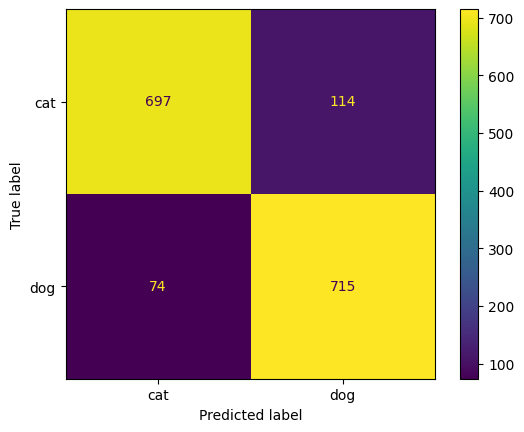

Testing Metrics:

Accuracy: 0.5925
Precision: 0.5669642857142857
Recall: 0.6580310880829016
F1 Score: 0.6091127098321343
Confusion Matrix:



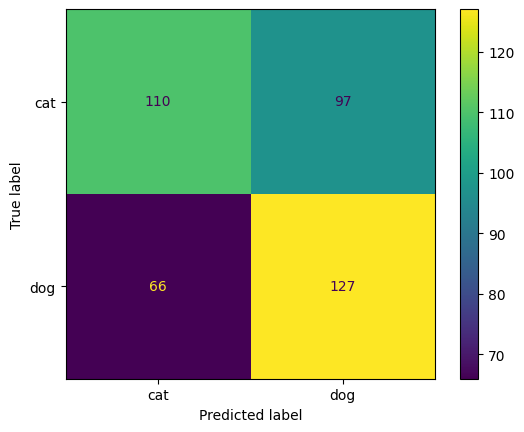




SVM with sigmoid Kernel:

Training Metrics: 

Accuracy: 0.46625
Precision: 0.45838668373879643
Recall: 0.45373891001267425
F1 Score: 0.4560509554140127
Confusion Matrix:



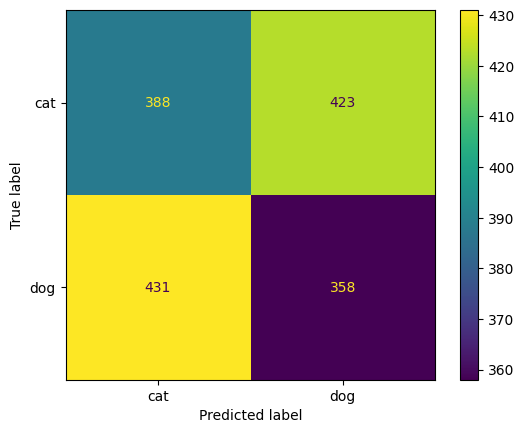

Testing Metrics:

Accuracy: 0.4725
Precision: 0.45408163265306123
Recall: 0.46113989637305697
F1 Score: 0.45758354755784064
Confusion Matrix:



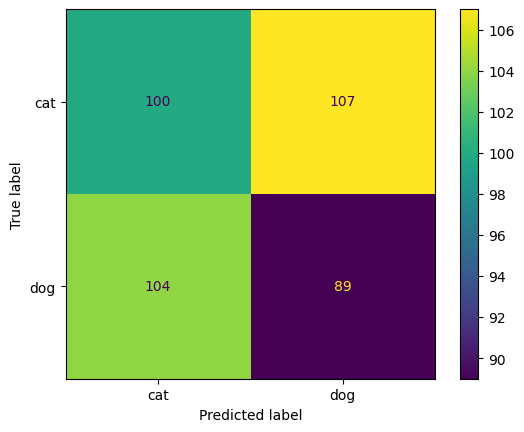

In [23]:
acc = []
test_acc = []

for kernel in kernels:
    print(f'SVM with {kernel} Kernel:\n')
    print('Training Metrics: \n')
    acc.append(evaluate(Y_train[:n_samples], train_pred[kernel]))
    print('Testing Metrics:\n')
    test_acc.append(evaluate(Y_test[:n_samples], test_pred[kernel]))
    print('\n\n')

### c. Output Accuracy Visualization

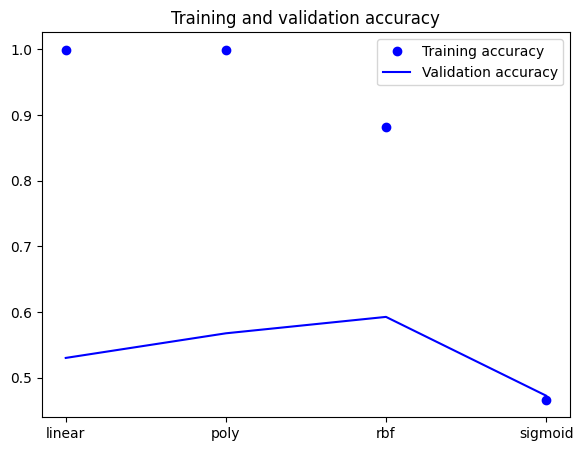

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(kernels, acc, 'bo', label='Training accuracy')
plt.plot(kernels, test_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

## 4. Parameter Tuning

In the case of SVM, important hyperparameters include the choice of kernel, C (regularization parameter), and gamma (kernel coefficient).

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Create an SVM classifier
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and their corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.60875


### Final Model

In [28]:
# Use the best parameters to train the final model
final_model = SVC(**best_params)
final_model.fit(X_train, Y_train)

# Evaluate the final model
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(Y_test, final_predictions)
print("Final Model Accuracy:", final_accuracy)


Final Model Accuracy: 0.5925


## 5. Submission

In [31]:
from tqdm import tqdm

# Load the test data
def load_data():
    # Define list to store the images
    images = []

    TEST_DIR_PATH = './test1'
    file_names = os.listdir(TEST_DIR_PATH)
    file_path = [os.path.join(TEST_DIR_PATH,file_name) for file_name in file_names]

    # Preprocess images
    test_features = process_images(file_path)

    # Convert the lists to numpy arrays
    features = np.array(test_features)

    return features


In [34]:
test_images = load_data()

In [36]:
sample_submission_df = pd.read_csv('sampleSubmission.csv')
sample_submission_df['label'] = final_model.predict(test_images)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
